In [49]:
import numpy as np
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Load Dataset

In [12]:
raw_df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
print(f"Dataset has {len(raw_df)} samples")

Dataset has 284807 samples


## Clean Dataset

In [14]:
old_rows = len(raw_df)
raw_df = raw_df.dropna(axis=0)
new_rows = len(raw_df)
print(f"Dropped {old_rows - new_rows} rows with NaN values")

Dropped 0 rows with NaN values


## Split data into X and y, and then scale X values

In [23]:
X = raw_df.drop(columns=['Time', 'Class']).to_numpy()
y = raw_df['Class'].to_numpy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split into training, validation and testing

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, shuffle= True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, shuffle = True)

X_train = np.expand_dims(X_train, axis = 2)
X_test = np.expand_dims(X_test, axis = 2)
X_val = np.expand_dims(X_val, axis = 2)

y_train = np.expand_dims(y_train, axis = 1)
y_test = np.expand_dims(y_test, axis = 1)
y_val = np.expand_dims(y_val, axis = 1)

In [34]:
X_train.shape

(159491, 29, 1)

In [46]:
np.unique(y_train)

array([0, 1], dtype=int64)

## Create Model

In [57]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=[X_train.shape[1], 1]),

    # Add a convolutional layer
    tf.keras.layers.Conv1D(filters = 64, kernel_size = 5, activation = 'relu'),
    tf.keras.layers.MaxPool1D(pool_size = 2, strides = 1, padding = 'same'),
    tf.keras.layers.BatchNormalization(),

    #tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences= True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),

    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_13 (Conv1D)          (None, 25, 64)            384       
                                                                 
 max_pooling1d_13 (MaxPooli  (None, 25, 64)            0         
 ng1D)                                                           
                                                                 
 batch_normalization_13 (Ba  (None, 25, 64)            256       
 tchNormalization)                                               
                                                                 
 bidirectional_6 (Bidirecti  (None, 25, 128)           66048     
 onal)                                                           
                                                                 
 bidirectional_7 (Bidirecti  (None, 64)                41216     
 onal)                                               

In [58]:
history = model.fit(
    X_train,
    y_train,
    validation_data = (X_val, y_val),
    epochs = 10,
    batch_size = 64
)

Epoch 1/10
2493/2493 [==============================] - 147s 57ms/step - loss: 0.0089 - acc: 0.9987 - val_loss: 0.0037 - val_acc: 0.9993
Epoch 2/10
2493/2493 [==============================] - 134s 54ms/step - loss: 0.0051 - acc: 0.9992 - val_loss: 0.0027 - val_acc: 0.9995
Epoch 3/10
2493/2493 [==============================] - 133s 53ms/step - loss: 0.0043 - acc: 0.9993 - val_loss: 0.0032 - val_acc: 0.9994
Epoch 4/10
2493/2493 [==============================] - 135s 54ms/step - loss: 0.0042 - acc: 0.9993 - val_loss: 0.0028 - val_acc: 0.9994
Epoch 5/10
2493/2493 [==============================] - 133s 54ms/step - loss: 0.0036 - acc: 0.9994 - val_loss: 0.0026 - val_acc: 0.9995
Epoch 6/10
2493/2493 [==============================] - 132s 53ms/step - loss: 0.0033 - acc: 0.9994 - val_loss: 0.0027 - val_acc: 0.9995
Epoch 7/10
2493/2493 [==============================] - 132s 53ms/step - loss: 0.0032 - acc: 0.9995 - val_loss: 0.0028 - val_acc: 0.9995
Epoch 8/10
2493/2493 [===================

## Plot metrics

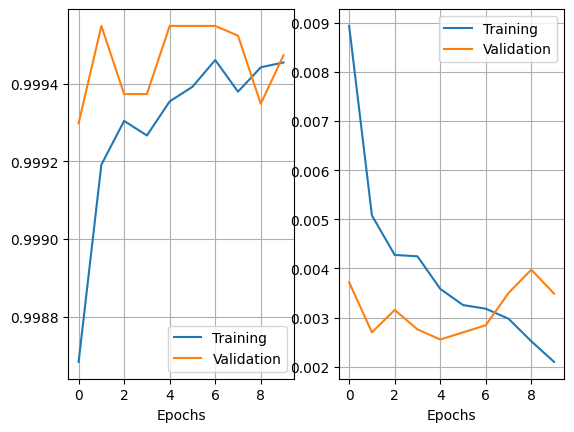

In [59]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
axes[0].plot(history.history['acc'], label = 'Training')
axes[0].plot(history.history['val_acc'], label = 'Validation')
axes[0].set_xlabel('Epochs')
axes[0].grid(True)
axes[0].legend()

axes[1].plot(history.history['loss'], label = 'Training')
axes[1].plot(history.history['val_loss'], label = 'Validation')
axes[1].set_xlabel('Epochs')
axes[1].grid(True)
axes[1].legend()

plt.show()



## Now, compute the accuracy with the test dataset

In [68]:
y_pred = model.predict(X_test)

def fix_pred(y):
    return 1 if y > 0.9 else 0

y_pred = np.vectorize(fix_pred)(y_pred)

accuracy = accuracy_score(y_pred, y_test)
print("The accuracy on testing is {:.4f}".format(accuracy))

2671/2671 [==============================] - 31s 12ms/step
The accuracy on testing is 0.9992
